In [1]:
import numpy as np
import datetime
import pandas as pd
import datetime, time

from curve import LinearCurve, QuadraticCurve, CubicCurve, CubicSplineCurve
from pricer import CurvePricer, SimplePricer
from derivative import ZeroCouponBond, CallOnZeroCouponBond, PutOnZeroCouponBond
from calibration import calibration, array_to_param, own_calibration

import ipywidgets as widgets
from ipywidgets import interact, interactive, interact_manual

In [2]:
today = datetime.date(day=1, month=1, year=2019)
yrs = [1, 2, 3, 5, 7, 10, 12, 15, 20, 25, 30]
test_dates = [datetime.date(day=1, month=6, year=2019+i) for i in yrs[:-1]]

In [3]:
test_dates

[datetime.date(2020, 6, 1),
 datetime.date(2021, 6, 1),
 datetime.date(2022, 6, 1),
 datetime.date(2024, 6, 1),
 datetime.date(2026, 6, 1),
 datetime.date(2029, 6, 1),
 datetime.date(2031, 6, 1),
 datetime.date(2034, 6, 1),
 datetime.date(2039, 6, 1),
 datetime.date(2044, 6, 1)]

In [4]:
M, N = 0,1

def curve01(shift, Y_0, k, nu):
    
    params = dict(N=N, M=M, 
              shift=np.array(shift), 
              delta=0, 
              Y_0=np.array(Y_0), 
              k=np.array([k]), 
              nu=np.array([nu]))

    bonds = [ZeroCouponBond(maturity=date) for date in test_dates]
    simpler = SimplePricer(today, shift=0.02)
    zero_prices = [simpler.price(bond, **params) for bond in bonds]

    zero_df = pd.DataFrame(dict(Zeros=zero_prices), index=test_dates)
    curve = CubicSplineCurve(today=today)
    curve.give_zeros(zero_df)
    curve.plot(by='Zeros')

interactive(curve01, 
            shift = widgets.FloatSlider(
                    value=0.02,
                    min=-0.1,
                    max=0.1,
                    step=0.001,
                    description='Shift:',
                    disabled=False,
                    continuous_update=True,
                    orientation='horizontal',
                    readout=True,
                    readout_format='.3f'),
            Y_0 = widgets.FloatSlider(
                    value=-0.02,
                    min=-0.1,
                    max=0.1,
                    step=0.001,
                    description='Y_0:',
                    disabled=False,
                    continuous_update=True,
                    orientation='horizontal',
                    readout=True,
                    readout_format='.3f'),
            k = widgets.FloatSlider(
                    value=1.5,
                    min=0.1,
                    max=2.5,
                    step=0.001,
                    description='k:',
                    disabled=False,
                    continuous_update=True,
                    orientation='horizontal',
                    readout=True,
                    readout_format='.3f'),
            nu = widgets.FloatSlider(
                value=0.02,
                min=0.01,
                max=1,
                step=0.001,
                description='nu:',
                disabled=False,
                continuous_update=True,
                orientation='horizontal',
                readout=True,
                readout_format='.3f')
           )


interactive(children=(FloatSlider(value=0.02, description='Shift:', max=0.1, min=-0.1, readout_format='.3f', s…

In [5]:
M,N = 0,2

def curve02(shift, Y_01, k1, nu1, Y_02, k2, nu2, rho):
    
    params = dict(N=N, M=M, 
              shift=np.array(shift), 
              delta=0, 
              Y_0=np.array([Y_01, Y_02]), 
              k=np.array([k1, k2]), 
              nu=np.array([nu1, nu2]),
              rho=np.array([[1,rho],[rho,1]]))

    bonds = [ZeroCouponBond(maturity=date) for date in test_dates]
    simpler = SimplePricer(today, shift=0.02)
    zero_prices = [simpler.price(bond, **params) for bond in bonds]

    zero_df = pd.DataFrame(dict(Zeros=zero_prices), index=test_dates)
    curve = CubicSplineCurve(today=today)
    curve.give_zeros(zero_df)
    curve.plot(by='Zeros')

interactive(curve02, 
            shift = widgets.FloatSlider(
                    value=0.02,
                    min=-0.1,
                    max=0.1,
                    step=0.001,
                    description='Shift:',
                    disabled=False,
                    continuous_update=True,
                    orientation='horizontal',
                    readout=True,
                    readout_format='.3f'),
            Y_01 = widgets.FloatSlider(
                    value=-0.02,
                    min=-0.1,
                    max=0.1,
                    step=0.001,
                    description='Y_01:',
                    disabled=False,
                    continuous_update=True,
                    orientation='horizontal',
                    readout=True,
                    readout_format='.3f'),
            k1 = widgets.FloatSlider(
                    value=1.5,
                    min=0.1,
                    max=2.5,
                    step=0.001,
                    description='k1:',
                    disabled=False,
                    continuous_update=True,
                    orientation='horizontal',
                    readout=True,
                    readout_format='.3f'),
            nu1 = widgets.FloatSlider(
                value=0.02,
                min=0.01,
                max=1,
                step=0.001,
                description='nu1:',
                disabled=False,
                continuous_update=True,
                orientation='horizontal',
                readout=True,
                readout_format='.3f'),
            Y_02 = widgets.FloatSlider(
                    value=-0.02,
                    min=-0.1,
                    max=0.1,
                    step=0.001,
                    description='Y_02:',
                    disabled=False,
                    continuous_update=True,
                    orientation='horizontal',
                    readout=True,
                    readout_format='.3f'),
            k2 = widgets.FloatSlider(
                    value=1.5,
                    min=0.1,
                    max=2.5,
                    step=0.001,
                    description='k2:',
                    disabled=False,
                    continuous_update=True,
                    orientation='horizontal',
                    readout=True,
                    readout_format='.3f'),
            nu2 = widgets.FloatSlider(
                value=0.02,
                min=0.01,
                max=1,
                step=0.001,
                description='nu2:',
                disabled=False,
                continuous_update=True,
                orientation='horizontal',
                readout=True,
                readout_format='.3f'),
            rho = widgets.FloatSlider(
                value=0,
                min=-0.99,
                max=0.99,
                step=0.01,
                description='rho:',
                disabled=False,
                continuous_update=True,
                orientation='horizontal',
                readout=True,
                readout_format='.2f')
           )

interactive(children=(FloatSlider(value=0.02, description='Shift:', max=0.1, min=-0.1, readout_format='.3f', s…

In [6]:
M,N = 1,3

def curve13(shift, X_0, alpha, theta, sigma, Y_01, k1, nu1, Y_02, k2, nu2, rho):
    
    params = dict(N=N, M=M, 
              shift=np.array(shift), 
              delta=0,
              X_0=np.array(X_0),
              alpha=np.array([alpha]),
              theta=np.array([theta]),
              sigma=np.array([sigma]),
              Y_0=np.array([Y_01, Y_02]), 
              k=np.array([k1, k2]), 
              nu=np.array([nu1, nu2]),
              rho=np.array([[1,rho],[rho,1]]))

    bonds = [ZeroCouponBond(maturity=date) for date in test_dates]
    simpler = SimplePricer(today, shift=0.02)
    zero_prices = [simpler.price(bond, **params) for bond in bonds]

    zero_df = pd.DataFrame(dict(Zeros=zero_prices), index=test_dates)
    curve = CubicSplineCurve(today=today)
    curve.give_zeros(zero_df)
    curve.plot(by='Zeros')

interactive(curve13, 
            shift = widgets.FloatSlider(
                    value=0.02,
                    min=-0.1,
                    max=0.1,
                    step=0.001,
                    description='Shift:',
                    disabled=False,
                    continuous_update=True,
                    orientation='horizontal',
                    readout=True,
                    readout_format='.3f'),
            X_0 = widgets.FloatSlider(
                    value=0.01,
                    min=0.001,
                    max=0.1,
                    step=0.001,
                    description='X_0:',
                    disabled=False,
                    continuous_update=True,
                    orientation='horizontal',
                    readout=True,
                    readout_format='.3f'),
            alpha = widgets.FloatSlider(
                    value=1.5,
                    min=0.1,
                    max=2.5,
                    step=0.001,
                    description='alpha:',
                    disabled=False,
                    continuous_update=True,
                    orientation='horizontal',
                    readout=True,
                    readout_format='.3f'),
            theta = widgets.FloatSlider(
                    value=0.03,
                    min=0.001,
                    max=0.1,
                    step=0.001,
                    description='theta:',
                    disabled=False,
                    continuous_update=True,
                    orientation='horizontal',
                    readout=True,
                    readout_format='.3f'),
            sigma = widgets.FloatSlider(
                value=0.02,
                min=0.01,
                max=1,
                step=0.001,
                description='sigma:',
                disabled=False,
                continuous_update=True,
                orientation='horizontal',
                readout=True,
                readout_format='.3f'),
            Y_01 = widgets.FloatSlider(
                    value=-0.02,
                    min=-0.1,
                    max=0.1,
                    step=0.001,
                    description='Y_01:',
                    disabled=False,
                    continuous_update=True,
                    orientation='horizontal',
                    readout=True,
                    readout_format='.3f'),
            k1 = widgets.FloatSlider(
                    value=1.5,
                    min=0.1,
                    max=2.5,
                    step=0.001,
                    description='k1:',
                    disabled=False,
                    continuous_update=True,
                    orientation='horizontal',
                    readout=True,
                    readout_format='.3f'),
            nu1 = widgets.FloatSlider(
                value=0.02,
                min=0.01,
                max=1,
                step=0.001,
                description='nu1:',
                disabled=False,
                continuous_update=True,
                orientation='horizontal',
                readout=True,
                readout_format='.3f'),
            Y_02 = widgets.FloatSlider(
                    value=-0.02,
                    min=-0.1,
                    max=0.1,
                    step=0.001,
                    description='Y_02:',
                    disabled=False,
                    continuous_update=True,
                    orientation='horizontal',
                    readout=True,
                    readout_format='.3f'),
            k2 = widgets.FloatSlider(
                    value=1.5,
                    min=0.1,
                    max=2.5,
                    step=0.001,
                    description='k2:',
                    disabled=False,
                    continuous_update=True,
                    orientation='horizontal',
                    readout=True,
                    readout_format='.3f'),
            nu2 = widgets.FloatSlider(
                value=0.02,
                min=0.01,
                max=1,
                step=0.001,
                description='nu2:',
                disabled=False,
                continuous_update=True,
                orientation='horizontal',
                readout=True,
                readout_format='.3f'),
            rho = widgets.FloatSlider(
                value=0,
                min=-0.99,
                max=0.99,
                step=0.01,
                description='rho:',
                disabled=False,
                continuous_update=True,
                orientation='horizontal',
                readout=True,
                readout_format='.2f')
           )

interactive(children=(FloatSlider(value=0.02, description='Shift:', max=0.1, min=-0.1, readout_format='.3f', s…

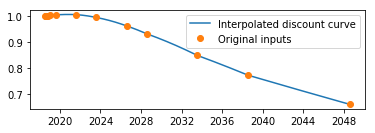

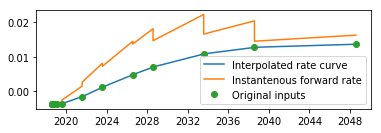

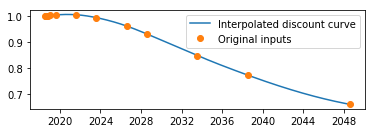

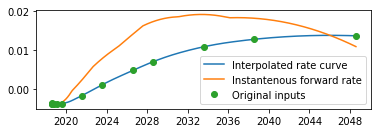

In [7]:
today = datetime.date(day=26, month=7, year=2018)
ios_data = [('2018-07-27', -0.366), ('2018-08-06', -0.3558), ('2018-08-30', -0.3632), ('2018-10-30', -0.3619), ('2019-01-30', -0.3615), ('2019-07-30', -0.3577), ('2021-07-30', -0.1549), ('2023-07-31', 0.1219), ('2026-07-30', 0.4841), ('2028-07-31', 0.7062), ('2033-07-29', 1.0862), ('2038-07-30', 1.2774), ('2048-07-30', 1.3653)]
swap_data = [('2018-07-27', -0.43), ('2018-08-06', -0.4094), ('2018-08-30', -0.3728), ('2018-10-30', -0.3065), ('2019-01-30', -0.2757), ('2019-07-30', -0.2573), ('2021-07-30', -0.01), ('2023-07-31', 0.3058), ('2026-07-30', 0.7073), ('2028-07-31', 0.9302), ('2033-07-29', 1.3060), ('2038-07-30', 1.4841), ('2048-07-30', 1.5502)]

def create_initial_data(list_of_data):

    idx, rates = [], []
    for point in list_of_data:
        date, rate = point
        idx.append(datetime.datetime.strptime(date, '%Y-%m-%d').date())
        rates.append(rate/100)
    return pd.DataFrame(rates, index=idx, columns=['Rates'])

ios_data = create_initial_data(ios_data)

ios_curve_l = LinearCurve(today=today)
ios_curve_l.give_rates(ios_data['Rates'])
ios_curve_l.plot(by='Rates')

ios_curve_q = QuadraticCurve(today=today)
ios_curve_q.give_rates(ios_data['Rates'])
ios_curve_q.plot(by='Rates')

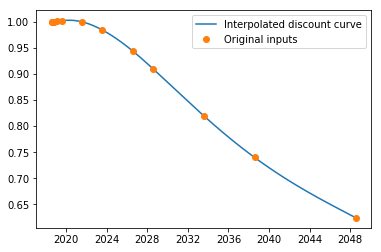

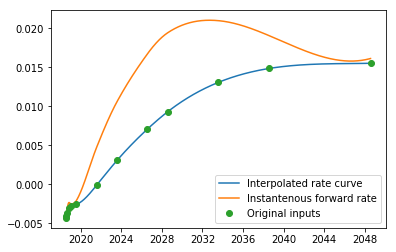

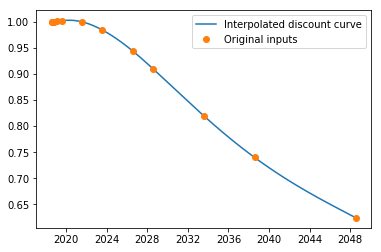

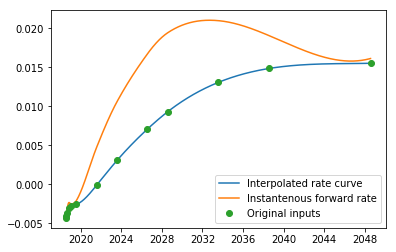

In [36]:
ios_curve_c = CubicCurve(today=today)
ios_curve_c.give_rates(ios_data['Rates'])
ios_curve_c.plot(by='Rates')

ios_curve_cspl = CubicSplineCurve(today=today)
ios_curve_cspl.give_rates(ios_data['Rates'])
ios_curve_cspl.plot(by='Rates')

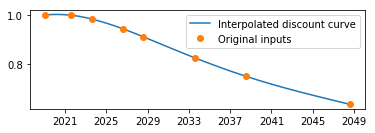

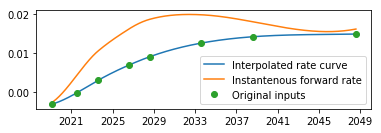

In [8]:
swap = [('2019-01-30', -0.305), ('2021-07-30', -0.003), ('2023-07-31', 0.308), ('2026-07-30', 0.7), ('2028-07-31', 0.913), ('2033-07-29', 1.264), ('2038-07-30', 1.427), ('2048-07-30', 1.496)]
germany = [('2019-01-30', -0.6), ('2021-07-30', -0.486), ('2023-07-31', -0.226), ('2026-07-30', 0.163), ('2028-07-31', 0.405), ('2038-07-30', 0.771), ('2048-07-30', 1.059)]
france = [('2019-01-30', -0.544), ('2021-07-30', -0.394), ('2023-07-31', 0.054), ('2026-07-30', 0.43), ('2028-07-31', 0.705), ('2033-07-29', 1.088), ('2038-07-30', 1.219), ('2048-07-30', 1.581)]
italy = [('2019-01-30', 0.217), ('2021-07-30', 1.04), ('2026-07-30', 2.4), ('2028-07-31', 2.705), ('2033-07-29', 3.072), ('2038-07-30', 3.33), ('2048-07-30', 3.497)]

swap = create_initial_data(swap)
germany = create_initial_data(germany)
france = create_initial_data(france)
italy = create_initial_data(italy)

swap_curve = CubicSplineCurve(today=today)
swap_curve.give_rates(swap['Rates'])
swap_curve.plot(by='Rates')

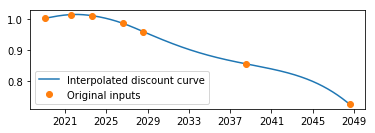

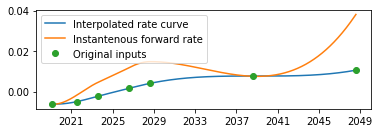

In [9]:
germany_curve = CubicSplineCurve(today=today)
germany_curve.give_rates(germany['Rates'])
germany_curve.plot(by='Rates')

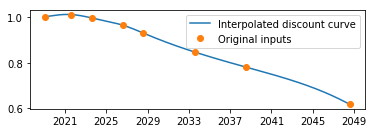

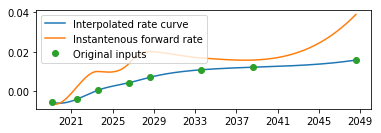

In [10]:
france_curve = CubicSplineCurve(today=today)
france_curve.give_rates(france['Rates'])
france_curve.plot(by='Rates')

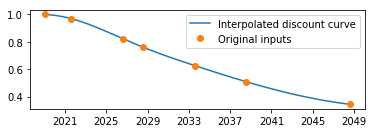

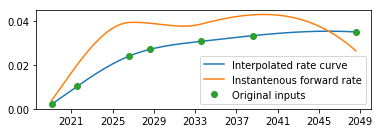

In [11]:
italy_curve = CubicSplineCurve(today=today)
italy_curve.give_rates(italy['Rates'])
italy_curve.plot(by='Rates')

In [62]:
ios_curve_cspl.interpolate()
germany_curve.interpolate(by='Rates')

def difference_of_curves(curve1, curve2, by='Rates'):
    
    df1 = curve1.interpolate()
    df2 = curve2.interpolate()
    
    common_index = df1.index.intersection(df2.index)
    
    return df1[by].loc[common_index] - df2[by].loc[common_index]

difference_of_curves(ios_curve_cspl, germany_curve)

2019-01-30    0.003243
2019-01-31    0.003245
2019-02-01    0.003247
2019-02-02    0.003250
2019-02-03    0.003252
2019-02-04    0.003254
2019-02-05    0.003256
2019-02-06    0.003258
2019-02-07    0.003260
2019-02-08    0.003262
2019-02-09    0.003264
2019-02-10    0.003266
2019-02-11    0.003268
2019-02-12    0.003270
2019-02-13    0.003273
2019-02-14    0.003275
2019-02-15    0.003277
2019-02-16    0.003279
2019-02-17    0.003281
2019-02-18    0.003283
2019-02-19    0.003284
2019-02-20    0.003286
2019-02-21    0.003288
2019-02-22    0.003290
2019-02-23    0.003292
2019-02-24    0.003294
2019-02-25    0.003296
2019-02-26    0.003298
2019-02-27    0.003300
2019-02-28    0.003302
                ...   
2048-07-01    0.004983
2048-07-02    0.004980
2048-07-03    0.004978
2048-07-04    0.004975
2048-07-05    0.004973
2048-07-06    0.004970
2048-07-07    0.004968
2048-07-08    0.004966
2048-07-09    0.004963
2048-07-10    0.004961
2048-07-11    0.004958
2048-07-12    0.004956
2048-07-13 

In [64]:
difference_of_curves(italy_curve, germany_curve)

2019-01-30    0.008170
2019-01-31    0.008180
2019-02-01    0.008190
2019-02-02    0.008200
2019-02-03    0.008210
2019-02-04    0.008220
2019-02-05    0.008230
2019-02-06    0.008240
2019-02-07    0.008250
2019-02-08    0.008260
2019-02-09    0.008270
2019-02-10    0.008280
2019-02-11    0.008290
2019-02-12    0.008300
2019-02-13    0.008310
2019-02-14    0.008320
2019-02-15    0.008330
2019-02-16    0.008340
2019-02-17    0.008350
2019-02-18    0.008360
2019-02-19    0.008370
2019-02-20    0.008380
2019-02-21    0.008390
2019-02-22    0.008400
2019-02-23    0.008410
2019-02-24    0.008419
2019-02-25    0.008429
2019-02-26    0.008439
2019-02-27    0.008449
2019-02-28    0.008459
                ...   
2048-07-01    0.024474
2048-07-02    0.024471
2048-07-03    0.024468
2048-07-04    0.024465
2048-07-05    0.024461
2048-07-06    0.024458
2048-07-07    0.024455
2048-07-08    0.024452
2048-07-09    0.024448
2048-07-10    0.024445
2048-07-11    0.024442
2048-07-12    0.024439
2048-07-13 